# Problem Statement

### Upload Required Libraries

In [731]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [732]:
df_train =pd.read_csv("../data/Train_dataset.csv")

In [733]:
df_test= pd.read_csv("../data/Test_dataset.csv")

In [734]:
df_test_close = df_test

In [735]:
df = df_train.append(df_test)

In [736]:
print("Number of rows in dataset",df.shape)

Number of rows in dataset (3993, 34)


### EDA

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Opening Day of Restaurant      3993 non-null   object 
 6   Facebook Popularity Quotient   3894 non-null   float64
 7   Endorsed By                    3993 non-null   object 
 8   Instagram Popularity Quotient  3937 non-null   float64
 9   Fire Audit                     3993 non-null   int64  
 10  Liquor License Obtained        3993 non-null   int64  
 11  Situated in a Multi Complex    3993 non-null   int64  
 12  Dedicated Parking              3993 non-null   in

In [738]:
# Check top few records to get a feel of the data structure
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000.0,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000.0,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000.0,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000.0,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000.0,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [739]:
df = df.drop('Registration Number', axis=1)

In [740]:
df.head()

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000.0,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,50000000.0,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,32500000.0,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,110000000.0,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,20000000.0,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


#### Data type of data features

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   float64
 1   Cuisine                        3993 non-null   object 
 2   City                           3993 non-null   object 
 3   Restaurant Location            3993 non-null   object 
 4   Opening Day of Restaurant      3993 non-null   object 
 5   Facebook Popularity Quotient   3894 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3937 non-null   float64
 8   Fire Audit                     3993 non-null   int64  
 9   Liquor License Obtained        3993 non-null   int64  
 10  Situated in a Multi Complex    3993 non-null   int64  
 11  Dedicated Parking              3993 non-null   int64  
 12  Open Sitting Available         3993 non-null   in

#### Feature Engineering

#### Change the data types of some features which are categorical in nature but are present as int or float

In [742]:
from datetime import date
def age(x):
    today = date.today()
    return today.year - x

df['Operational_Years'] = df['Opening Day of Restaurant'].apply (lambda row: age(pd.to_datetime(row, format = '%d-%m-%Y').year))
df.drop("Opening Day of Restaurant",axis=1,inplace=True)

In [743]:
def label_city(col_val):
    major_city_list = ['mumbai','banglore','hyderabad','delhi','pune','chennai','ahmedabad','kolkata','surat','jaipur','nagpur','visakapatnam']
    if col_val.lower() in major_city_list:
        return 1
    else:
        return 0
df['Major_City'] = df['City'].apply (lambda row: label_city(row))
df = df.drop(['City'], axis =1)

In [744]:
def label_cusine(col_val): 
    if 'indian' in col_val.split(","):
        return 'Indian'
    else:
        return 'Global'
df['Cuisine_Type'] = df['Cuisine'].apply (lambda row: label_cusine(row))
df = df.drop(['Cuisine'], axis =1)

In [745]:
def label_theme(col_val):
    other_theme = ['Italica','Piquant','Grand','Bakery','LaCuisine','Spoon','Sage','Flavors','Cinnamon','Savory','Ambiance','Resca','Cafepro','Bettaso','Umami','Picante','Benedicta','Marco','Petit','Carbone','TheGem','Mise En','Downtown','Moonrise','Belise','English','Delicio','Molino']
    if col_val in other_theme:
        return 'Other'
    else:
        return col_val
df['Restaurant Theme'] = df['Restaurant Theme'].apply (lambda row: label_theme(row))

In [746]:
def label_ambience(col_val):
    if col_val > 7:
        return 'Best'
    elif col_val >= 4 and col_val <= 7:
        return 'Good'
    else:
        return 'Bad'
df['Ambience'] = df['Ambience'].apply (lambda row: label_ambience(row))

In [747]:
def label_lively(col_val):
    if col_val > 7:
        return 'Very Lively'
    elif col_val >= 4 and col_val <= 7:
        return 'Moderately Lively'
    else:
        return 'Not Lively'
df['Lively'] = df['Lively'].apply (lambda row: label_lively(row))

In [748]:
def label_service(col_val):
    if col_val > 7:
        return 'Very Good'
    elif col_val >= 4 and col_val <= 7:
        return 'Good'
    else:
        return 'Bad'
df['Service'] = df['Service'].apply (lambda row: label_service(row))

In [749]:
def label_Comfortablility(col_val):
    if col_val > 7:
        return 'Very Comfortable'
    elif col_val >= 4 and col_val <= 7:
        return 'Moderately Comfortable'
    else:
        return 'Not Comfortable'
df['Comfortablility'] = df['Comfortablility'].apply (lambda row: label_Comfortablility(row))

In [750]:
def label_Privacy(col_val):
    if col_val > 7:
        return 'Good Privacy'
    elif col_val >= 4 and col_val <= 7:
        return 'Moderate Privacy'
    else:
        return 'No Privacy'
df['Privacy'] = df['Privacy'].apply (lambda row: label_Privacy(row))

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   float64
 1   Restaurant Location            3993 non-null   object 
 2   Facebook Popularity Quotient   3894 non-null   float64
 3   Endorsed By                    3993 non-null   object 
 4   Instagram Popularity Quotient  3937 non-null   float64
 5   Fire Audit                     3993 non-null   int64  
 6   Liquor License Obtained        3993 non-null   int64  
 7   Situated in a Multi Complex    3993 non-null   int64  
 8   Dedicated Parking              3993 non-null   int64  
 9   Open Sitting Available         3993 non-null   int64  
 10  Resturant Tier                 3944 non-null   float64
 11  Restaurant Type                3993 non-null   object 
 12  Restaurant Theme               3993 non-null   ob

In [752]:
df.head()

,Annual Turnover,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,...,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Operational_Years,Major_City,Cuisine_Type
0,42000000.0,Near Business Hub,84.3,Not Specific,95.8,1,1,1,0,1,...,NaN,NaN,Best,Very Lively,Good,Moderately Comfortable,Moderate Privacy,11,0,Indian
1,50000000.0,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,1,1,0,...,NaN,NaN,Good,Moderately Lively,Good,Not Comfortable,Good Privacy,12,0,Indian
2,32500000.0,Near Business Hub,85.0,Tier A Celebrity,68.2,1,1,1,1,0,...,NaN,NaN,Good,Very Lively,Good,Not Comfortable,Good Privacy,9,1,Global
3,110000000.0,Near Party Hub,85.6,Tier A Celebrity,83.6,0,1,1,1,1,...,NaN,NaN,Good,Moderately Lively,Good,Not Comfortable,Moderate Privacy,12,0,Global
4,20000000.0,Near Party Hub,NaN,Tier A Celebrity,76.8,1,1,1,1,1,...,NaN,NaN,Bad,Moderately Lively,Bad,Moderately Comfortable,Moderate Privacy,10,0,Global


In [753]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RESTAURANT LOCATION :  2
Near Business Hub     957
Near Party Hub       3036
Name: Restaurant Location, dtype: int64


ENDORSED BY :  3
Local Celebrity       37
Tier A Celebrity    1696
Not Specific        2260
Name: Endorsed By, dtype: int64


RESTAURANT TYPE :  4
Buffet/Family Restaurant       2
Gastro Bar                    53
Caffee                       243
Bar                         3695
Name: Restaurant Type, dtype: int64


RESTAURANT THEME :  7
Chinese      82
Parsi       121
Other       175
Nature      201
90's        659
Greek      1163
Arabian    1592
Name: Restaurant Theme, dtype: int64


AMBIENCE :  3
Bad      357
Best    1339
Good    2297
Name: Ambience, dtype: int64


LIVELY :  3
Not Lively            200
Very Lively          1630
Moderately Lively    2163
Name: Lively, dtype: int64


SERVICE :  3
Very Good     205
Bad          1002
Good         2786
Name: Service, dtype: int64


COMFORTABLILITY :  3
Very Comfortable            84
Moderately Comfortable    1747
Not Comf

In [754]:
cat=["Restaurant Location","Endorsed By","Restaurant Type","Restaurant Theme","Ambience","Lively","Service","Comfortablility","Privacy","Major_City","Cuisine_Type",'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier','Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']

In [755]:
for i in cat:
    df[i]=df[i].astype("object")

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   float64
 1   Restaurant Location            3993 non-null   object 
 2   Facebook Popularity Quotient   3894 non-null   float64
 3   Endorsed By                    3993 non-null   object 
 4   Instagram Popularity Quotient  3937 non-null   float64
 5   Fire Audit                     3993 non-null   object 
 6   Liquor License Obtained        3993 non-null   object 
 7   Situated in a Multi Complex    3993 non-null   object 
 8   Dedicated Parking              3993 non-null   object 
 9   Open Sitting Available         3993 non-null   object 
 10  Resturant Tier                 3944 non-null   object 
 11  Restaurant Type                3993 non-null   object 
 12  Restaurant Theme               3993 non-null   ob

#### Making different list for categorical columns and numerical columns


In [757]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num) 

['Restaurant Location', 'Endorsed By', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Major_City', 'Cuisine_Type']
['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Order Wait Time', 'Operational_Years']


In [758]:
fig, ax = plt.subplots(28, 1, figsize=(150, 200))
for variable, subplot in zip(cat, ax.flatten()):
    df_2 = df[[variable,'Annual Turnover']].groupby(variable)['Annual Turnover'].sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        label.set_size(25)

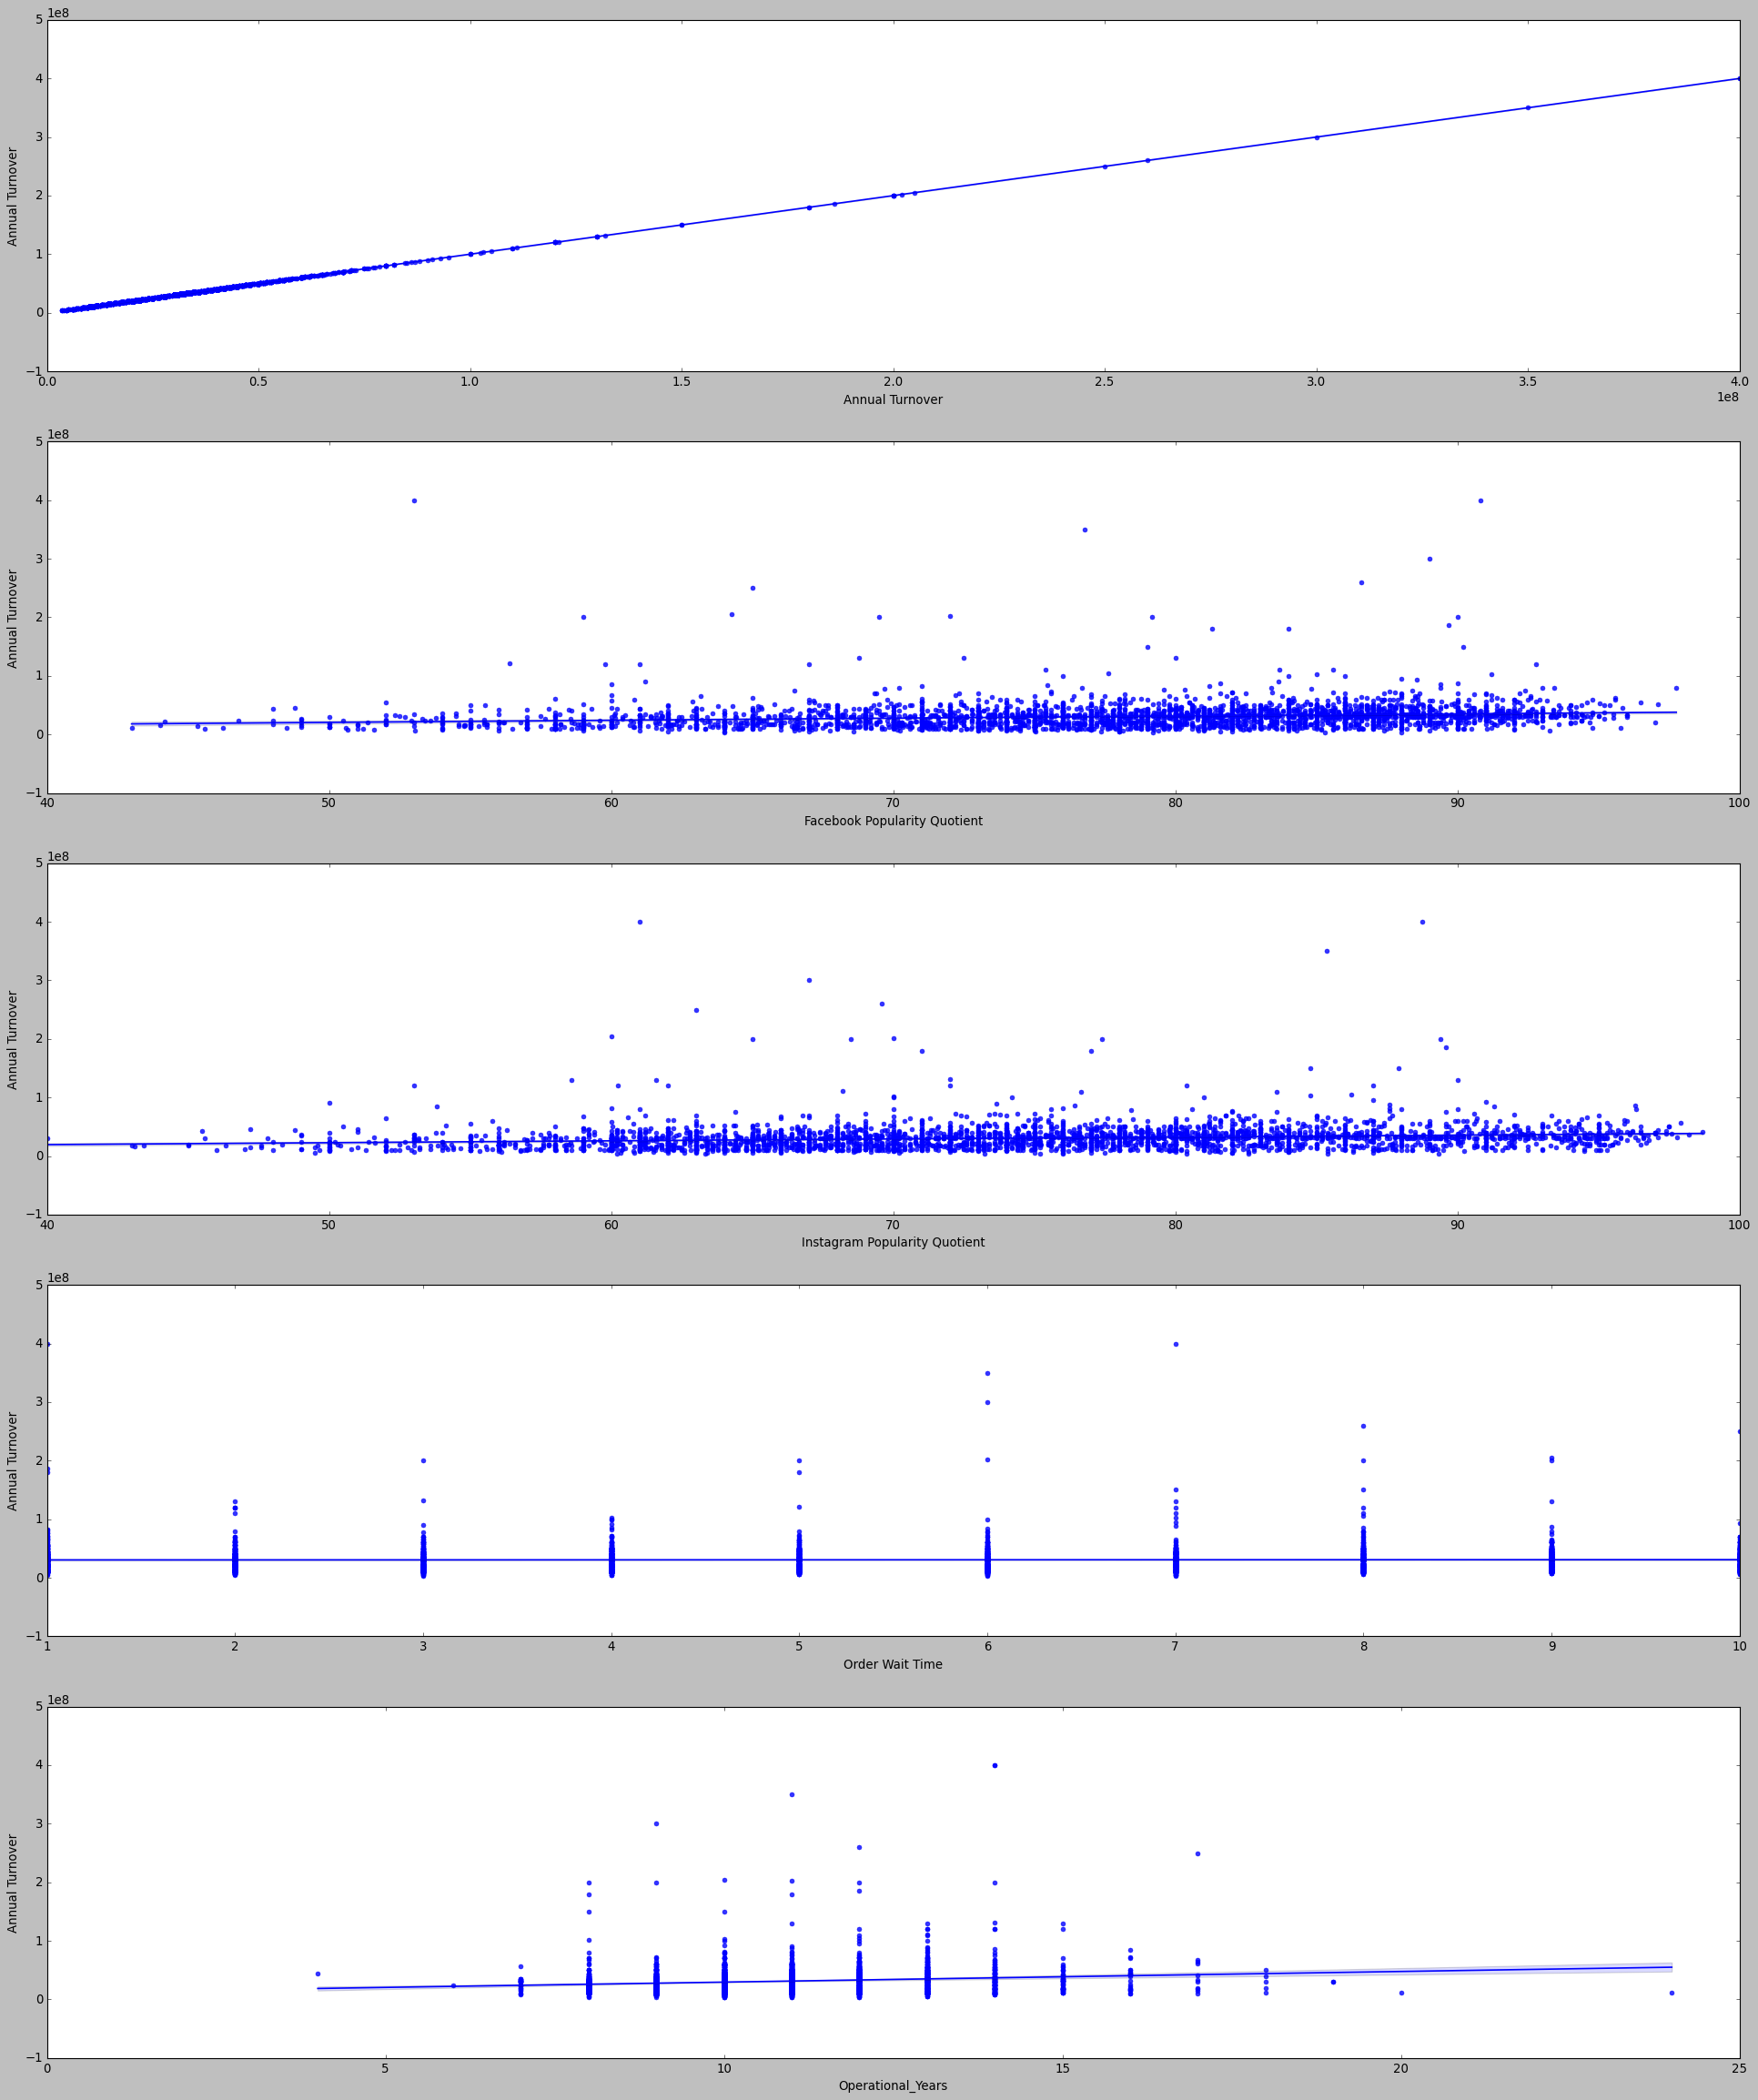

In [759]:
fig, ax = plt.subplots(5, 1, figsize=(30, 35))
for variable, subplot in zip(num, ax.flatten()):
    sns.regplot(x=df[variable], y=df['Annual Turnover'], ax=subplot)

#### Describe for numerical and categorical columns

In [760]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.00,30000000.00,3.700000e+07,4.000000e+08
Facebook Popularity Quotient,3894.0,7.788768e+01,9.861789e+00,43.0,71.66,79.00,8.566750e+01,9.776000e+01
Instagram Popularity Quotient,3937.0,7.444895e+01,1.099066e+01,40.0,66.00,74.33,8.260000e+01,9.870000e+01
Order Wait Time,3993.0,5.516404e+00,2.861498e+00,1.0,3.00,6.00,8.000000e+00,1.000000e+01
Operational_Years,3993.0,1.058878e+01,1.769451e+00,4.0,9.00,10.00,1.200000e+01,2.400000e+01


In [761]:
df[cat].describe().T

,count,unique,top,freq
Restaurant Location,3993,2,Near Party Hub,3036
Endorsed By,3993,3,Not Specific,2260
Fire Audit,3993,2,1,3162
Liquor License Obtained,3993,2,1,3945
Situated in a Multi Complex,3993,2,1,3217
Dedicated Parking,3993,2,1,3205
Open Sitting Available,3993,2,1,3197
Resturant Tier,3944,2,2,3657
Restaurant Type,3993,4,Bar,3695
Restaurant Theme,3993,7,Arabian,1592


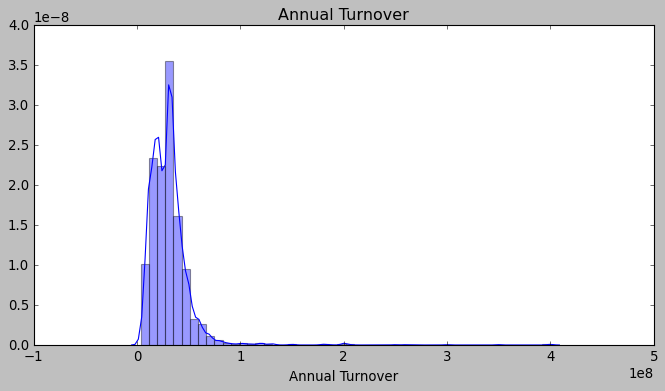

In [762]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Annual Turnover')
sns.distplot(df['Annual Turnover'])
plt.show()

* Dependent variable orders is showing right skewed distribution

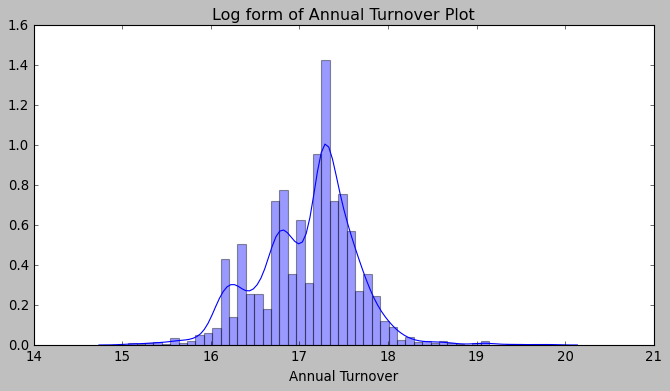

In [763]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Log form of Annual Turnover Plot')
sns.distplot(np.log(df['Annual Turnover']))
plt.show()

**log of orders addresses skewness in distribution 

In [764]:
# Are there any missing values ?
df.isnull().sum()

Annual Turnover                   500
Restaurant Location                 0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         246
Live Music Rating                 867
Comedy Gigs Rating               2853
Value Deals Rating               3092
Live Sports Rating               3759
Ambience                            0
Lively      

## Imputation of all missing values with the bext possible option

In [765]:
df['Facebook Popularity Quotient'] = df['Facebook Popularity Quotient'].fillna(df['Facebook Popularity Quotient'].mean())

In [766]:
df['Instagram Popularity Quotient'] = df['Instagram Popularity Quotient'].fillna(df['Instagram Popularity Quotient'].mean())

In [767]:
mode = df['Resturant Tier'].mode().values[0]
df['Resturant Tier'] = df['Resturant Tier'].fillna(mode)

In [768]:
mode = df['Overall Restaurant Rating'].mode().values[0]
df['Overall Restaurant Rating'] = df['Overall Restaurant Rating'].fillna(mode)

In [769]:
mode = df['Live Music Rating'].mode().values[0]
df['Live Music Rating'] = df['Live Music Rating'].fillna(mode)

In [770]:
mode = df['Comedy Gigs Rating'].mode().values[0]
df['Comedy Gigs Rating'] = df['Comedy Gigs Rating'].fillna(mode)

In [771]:
mode = df['Value Deals Rating'].mode().values[0]
df['Value Deals Rating'] = df['Value Deals Rating'].fillna(mode)

In [772]:
mode = df['Live Sports Rating'].mode().values[0]
df['Live Sports Rating'] = df['Live Sports Rating'].fillna(mode)

In [773]:
mode = df['Ambience'].mode().values[0]
df['Ambience'] = df['Ambience'].fillna(mode)

In [774]:
df.isna().sum()

Annual Turnover                  500
Restaurant Location                0
Facebook Popularity Quotient       0
Endorsed By                        0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating          0
Live Music Rating                  0
Comedy Gigs Rating                 0
Value Deals Rating                 0
Live Sports Rating                 0
Ambience                           0
Lively                             0
S

In [775]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Annual Turnover,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,...,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,Operational_Years,Major_City,Cuisine_Type


### Correlation Plot

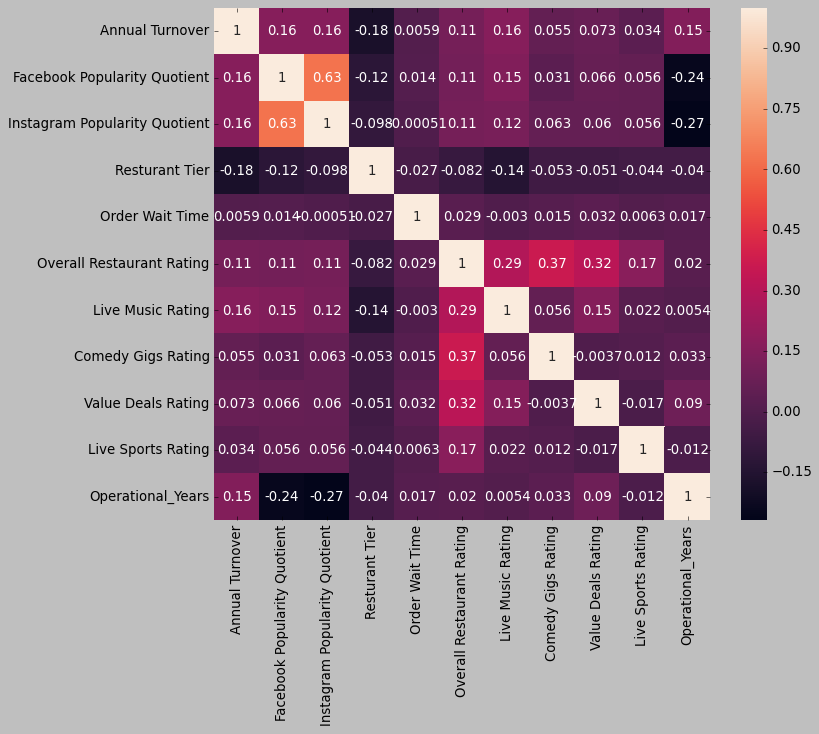

In [776]:
#plt.figure(figsize=(10,8))
#sns.heatmap(df.corr(),annot=True)
#plt.show()

Unit_Price and Final_price are highly correlated. One of them have to be dropped

In [777]:
# Dropping Unit_price 
#df.drop(['Facebook Popularity Quotient'], axis = 1,inplace=True)

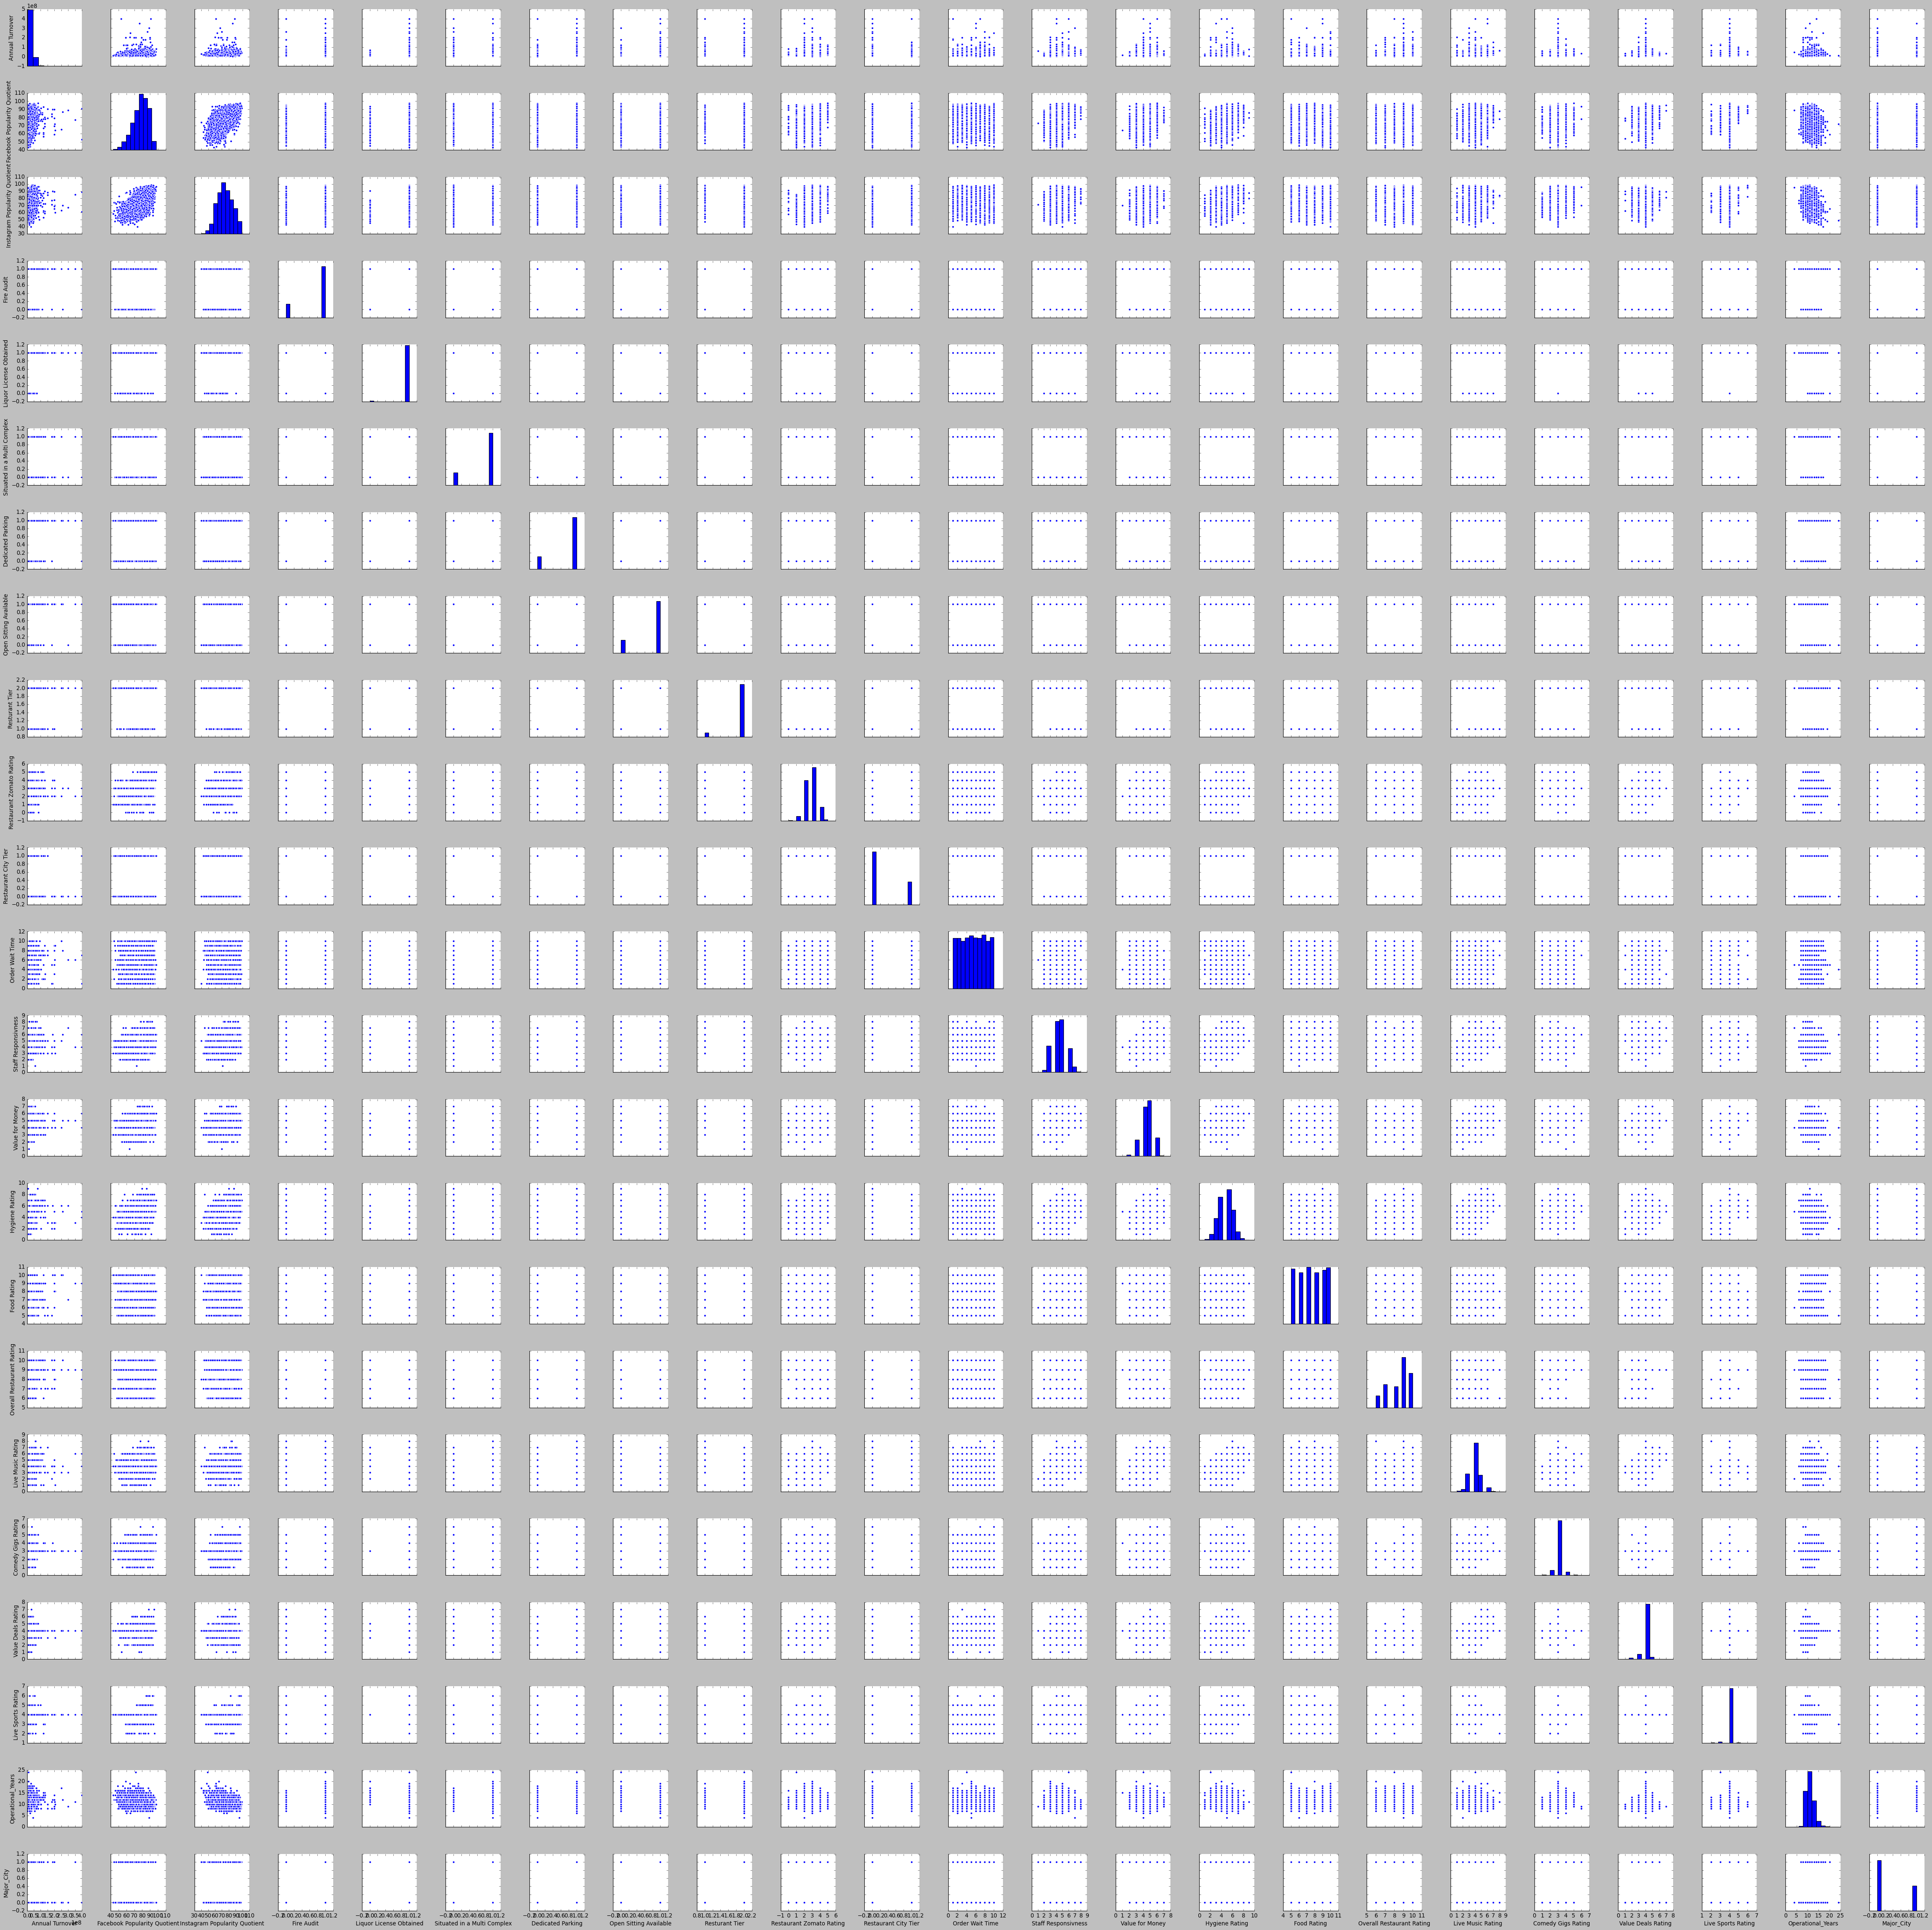

In [778]:
#sns.pairplot(df)

#### None of the continuous variable shows a significant relationship with the target variable. The same needs to be checked in the final model.

In [779]:
#df_train[df_train['is_major_city'] == '-1']

In [780]:
print(cat)
print(num)

['Restaurant Location', 'Endorsed By', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Major_City', 'Cuisine_Type']
['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Order Wait Time', 'Operational_Years']


In [781]:
one_hot_encoding_features = ['Restaurant Location','Endorsed By','Restaurant Type','Restaurant Theme','Cuisine_Type','Major_City']

In [782]:
#### get_dummies of the object variables

In [783]:
df = pd.get_dummies(df, columns=one_hot_encoding_features,drop_first=True)

In [784]:
###Label Encoding

In [785]:
from sklearn.preprocessing import LabelEncoder

In [786]:
lb_encode = LabelEncoder()
df["Fire Audit"] = lb_encode.fit_transform(df["Fire Audit"])
df["Liquor License Obtained"] = lb_encode.fit_transform(df["Liquor License Obtained"])
df["Situated in a Multi Complex"] = lb_encode.fit_transform(df["Situated in a Multi Complex"])
df["Dedicated Parking"] = lb_encode.fit_transform(df["Dedicated Parking"])
df["Open Sitting Available"] = lb_encode.fit_transform(df["Open Sitting Available"])
df["Resturant Tier"] = lb_encode.fit_transform(df["Resturant Tier"])
df["Restaurant Zomato Rating"] = lb_encode.fit_transform(df["Restaurant Zomato Rating"])
df["Restaurant City Tier"] = lb_encode.fit_transform(df["Restaurant City Tier"])
df["Staff Responsivness"] = lb_encode.fit_transform(df["Staff Responsivness"])
df["Value for Money"] = lb_encode.fit_transform(df["Value for Money"])
df["Hygiene Rating"] = lb_encode.fit_transform(df["Hygiene Rating"])
df["Food Rating"] = lb_encode.fit_transform(df["Food Rating"])
df["Live Music Rating"] = lb_encode.fit_transform(df["Live Music Rating"])
df["Comedy Gigs Rating"] = lb_encode.fit_transform(df["Comedy Gigs Rating"])
df["Value Deals Rating"] = lb_encode.fit_transform(df["Value Deals Rating"])
df["Live Sports Rating"] = lb_encode.fit_transform(df["Live Sports Rating"])
df["Ambience"] = lb_encode.fit_transform(df["Ambience"])
df["Lively"] = lb_encode.fit_transform(df["Lively"])
df["Service"] = lb_encode.fit_transform(df["Service"])
df["Comfortablility"] = lb_encode.fit_transform(df["Comfortablility"])
df["Privacy"] = lb_encode.fit_transform(df["Privacy"])

In [787]:
df.head()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Arabian,Restaurant Theme_Chinese,Restaurant Theme_Greek,Restaurant Theme_Nature,Restaurant Theme_Other,Restaurant Theme_Parsi,Cuisine_Type_Indian,Major_City_1
0,42000000.0,84.300000,95.8,1,1,1,0,1,1,3,...,0,0,1,0,0,0,0,0,1,0
1,50000000.0,85.400000,85.0,1,1,1,1,0,1,3,...,0,0,0,0,1,0,0,0,1,0
2,32500000.0,85.000000,68.2,1,1,1,1,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,110000000.0,85.600000,83.6,0,1,1,1,1,0,3,...,0,0,1,0,0,0,0,0,0,0
4,20000000.0,77.887678,76.8,1,1,1,1,1,1,3,...,0,0,0,0,1,0,0,0,0,0


#### Seperating Train and Test sets to the original values

In [788]:
df_train = df[0:3493]

### Scaling the variables as continuous variables have different weightage

In [789]:
#Scales the data. Essentially returns the z-scores of every attribute
#['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Order Wait Time']

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [790]:
#df['Annual Turnover'] = std_scale.fit_transform(df[['Annual Turnover']])
df_train['Facebook Popularity Quotient'] = std_scale.fit_transform(df_train[['Facebook Popularity Quotient']])
df_train['Instagram Popularity Quotient'] = std_scale.fit_transform(df_train[['Instagram Popularity Quotient']])
df_train['Order Wait Time'] = std_scale.fit_transform(df_train[['Order Wait Time']])
df_train['Operational_Years'] = std_scale.fit_transform(df_train[['Operational_Years']])

In [791]:
df_train.describe()

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Arabian,Restaurant Theme_Chinese,Restaurant Theme_Greek,Restaurant Theme_Nature,Restaurant Theme_Other,Restaurant Theme_Parsi,Cuisine_Type_Indian,Major_City_1
count,3.493000e+03,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,...,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.00000
mean,3.072571e+07,3.409176e-16,2.414012e-16,0.788720,0.988262,0.808188,0.801889,0.800172,0.927569,2.696536,...,0.060693,0.012883,0.393072,0.021185,0.294875,0.051245,0.042943,0.029488,0.078156,0.33381
std,2.165125e+07,1.000143e+00,1.000143e+00,0.408275,0.107719,0.393783,0.398633,0.399928,0.259237,0.787271,...,0.238800,0.112786,0.488502,0.144022,0.456052,0.220529,0.202758,0.169193,0.268456,0.47164
min,3.500000e+06,-3.606445e+00,-3.170800e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.800000e+07,-6.128823e-01,-7.377769e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.000000e+07,8.905655e-02,-4.971150e-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.700000e+07,7.909954e-01,7.183507e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,4.000000e+08,2.046227e+00,2.238990e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [792]:
df_test = df[3493:]

In [793]:
df_test = df_test.drop(['Annual Turnover'], axis =1)

### Scaling the variables as continuous variables have different weightage

In [794]:
#Scales the data. Essentially returns the z-scores of every attribute
#['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Order Wait Time']

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [795]:
#df['Annual Turnover'] = std_scale.fit_transform(df[['Annual Turnover']])
df_test['Facebook Popularity Quotient'] = std_scale.fit_transform(df_test[['Facebook Popularity Quotient']])
df_test['Instagram Popularity Quotient'] = std_scale.fit_transform(df_test[['Instagram Popularity Quotient']])
df_test['Order Wait Time'] = std_scale.fit_transform(df_test[['Order Wait Time']])
df_test['Operational_Years'] = std_scale.fit_transform(df_test[['Operational_Years']])

In [796]:
df_test.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,...,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Arabian,Restaurant Theme_Chinese,Restaurant Theme_Greek,Restaurant Theme_Nature,Restaurant Theme_Other,Restaurant Theme_Parsi,Cuisine_Type_Indian,Major_City_1
0,0.045541,-0.507976,1,1,1,1,0,1,3,0,...,0,0,0,0,1,0,0,0,0,0
1,1.154388,1.875950,1,1,1,1,1,1,4,0,...,0,0,0,0,0,1,0,0,0,1
2,0.641162,0.993014,1,1,1,0,1,1,2,0,...,0,0,0,0,1,0,0,0,0,1
3,0.182534,-0.031191,0,1,1,1,1,1,3,0,...,0,1,0,0,0,0,0,0,0,0
4,0.707673,1.033629,1,1,1,0,0,0,4,1,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection

Create a new dataframe with the relevant features that would go into the ML model.

In [730]:
df_train = df_train[['Resturant Tier', 'Staff Responsivness', 'Hygiene Rating',
       'Live Music Rating', 'Live Sports Rating', 'Comfortablility',
       'Operational_Years', 'Restaurant Location_Near Party Hub',
       'Endorsed By_Tier A Celebrity', 'Restaurant Type_Caffee',
       'Restaurant Theme_Parsi', 'Cuisine_Type_Indian', 'Major_City_1','Annual Turnover']]

In [559]:
df_test = df_test[['Resturant Tier', 'Staff Responsivness', 'Hygiene Rating',
       'Live Music Rating', 'Live Sports Rating', 'Comfortablility',
       'Operational_Years', 'Restaurant Location_Near Party Hub',
       'Endorsed By_Tier A Celebrity', 'Restaurant Type_Caffee',
       'Restaurant Theme_Parsi', 'Cuisine_Type_Indian', 'Major_City_1']]

### Train-Test Split

In [797]:
df_train.columns

Index(['Annual Turnover', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'Operational_Years', 'Restaurant Location_Near Party Hub',
       'Endorsed By_Not Specific', 'Endorsed By_Tier A Celebrity',
       'Restaurant Type_Buffet/Family Restaurant', 'Restaurant Type_Caffee',
       'Restaurant Type_Gastro Bar', 'Restaurant Theme_Arabian',
       'Restaurant Theme_Chinese', 'Restaurant Theme_Greek',
       'Restaurant Theme_Nature', 'Restaurant Theme_Oth

In [798]:
# Copy all the predictor variables into X dataframe
X = df_train.drop('Annual Turnover', axis=1)

# Copy target into the y dataframe. Target variable is converted in to Log. 
y = np.log1p(df_train[['Annual Turnover']])

In [799]:
X.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,...,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Arabian,Restaurant Theme_Chinese,Restaurant Theme_Greek,Restaurant Theme_Nature,Restaurant Theme_Other,Restaurant Theme_Parsi,Cuisine_Type_Indian,Major_City_1
0,0.656801,1.971726,1,1,1,0,1,1,3,0,...,0,0,1,0,0,0,0,0,1,0
1,0.770350,0.976399,1,1,1,1,0,1,3,0,...,0,0,0,0,1,0,0,0,1,0
2,0.729060,-0.571889,1,1,1,1,0,1,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0.790995,0.847375,0,1,1,1,1,0,3,1,...,0,0,1,0,0,0,0,0,0,0
4,-0.005119,0.220687,1,1,1,1,1,1,3,0,...,0,0,0,0,1,0,0,0,0,0


In [800]:
y.head()

,Annual Turnover
0,17.553180
1,17.727534
2,17.296751
3,18.515991
4,16.811243


In [801]:
def print_accuracy_report(y_test, y_pred,X_test, model):
 rmse = np.sqrt(mean_squared_error(y_test, y_pred))
 print("RMSE: %f" % (rmse))

#### Benchmarking Model

#### XGBoost Regressor Model 

In [855]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
#xgb1 = XGBRegressor()
'''learning_rate': [0.1], #so called `eta` value
              'n_estimators': [63],
             'max_depth':[4],
             'min_child_weight':[8],
             'gamma':[0],
             'subsample':[0.8],
             'colsample_bytree':[0.9],
             'nthread':[4],
             'reg_alpha': [0.005],
             'scale_pos_weight':[1]'''
                
parameters = {'learning_rate': [0.1], #so called `eta` value
              'n_estimators': [63],
             'max_depth':[4],
             'min_child_weight':[8],
             'gamma':[0],
             'subsample':[0.8],
             'colsample_bytree':[0.9],
             'nthread':[4],
             'reg_alpha': [0.005],
             'scale_pos_weight':[1]}

def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)
    #xgb1 = XGBRegressor()
    xgb_grid = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
                             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                             nthread=4, scale_pos_weight=1, seed=27), 
                             param_grid = parameters,n_jobs=4,iid=False, cv=5,verbose=True)
    xgb_grid.fit(X_train, y_train)
    print(xgb_grid.best_params_)
    y_pred = np.exp(xgb_grid.best_estimator_.predict(X_test))
    print(print_accuracy_report(y_test, y_pred, X_test, xgb_grid.best_estimator_))
    return xgb_grid.best_estimator_

In [856]:
xgb_model = XGBoostRegressorModel(X,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.3s finished


{'learning_rate': 0.1}
RMSE: 28603675.040324
None


In [804]:
SelectFeaturesFromModel(xgb_model,X)

Total features selected:  16
Names of selected Features:
 Index(['Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Resturant Tier', 'Restaurant Zomato Rating', 'Staff Responsivness',
       'Hygiene Rating', 'Live Music Rating', 'Value Deals Rating',
       'Live Sports Rating', 'Comfortablility', 'Operational_Years',
       'Restaurant Type_Caffee', 'Restaurant Type_Gastro Bar',
       'Restaurant Theme_Parsi'],
      dtype='object')




#### Tuned Models

In [541]:
# Source:- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
import matplotlib.pylab as plt
import numpy as np 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVGradientBoostingRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
    estimator = GradientBoostingRegressor(random_state=42,n_estimators=800,learning_rate=0.05,max_depth=8)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    param_grid={ 
                'subsample':[1.0],
                'n_estimators': [800,1000],
                'learning_rate':[0.05,0.1],
                'max_depth' : [2,4,10]
               } 
    n_jobs=7
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = np.exp(regressor.best_estimator_.predict(X_test))
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_

In [542]:
gradientBoostingModelCV = GridSearchCVGradientBoostingRegressor(X,y)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 800, 'subsample': 1.0}
RMSE: 28669209.253462
None


In [543]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    # Create the random grid
    param_grid = { 
    'n_estimators': [1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15]
    }
    n_jobs=7
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = np.exp(regressor.best_estimator_.predict(X_test))
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_

In [544]:
randomForestRegressorModel = GridSearchCVRandomForestRegressor(X,y)

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 1500}
RMSE: 27439789.952505
None


In [545]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [644]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'max_features': max_features,
               'bootstrap': bootstrap,
               'n_estimators': n_estimators
              }
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=7
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = cv, verbose=2, random_state=42, n_jobs = n_jobs)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = np.exp(rf_random.best_estimator_.predict(X_test))
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_

In [546]:
randomForestRegressorModel2 = RandomizedSearchCVRandomForestRegressor(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   11.9s finished


{'n_estimators': 644, 'max_features': 'auto', 'bootstrap': True}
RMSE: 27979822.551163
None


In [547]:
import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=900, max_depth=18)
    # Create the random grid
    param_grid = { 
    'min_samples_split':range(10,100,5)
    }
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = np.exp(regressor.best_estimator_.predict(X_test))
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_

In [548]:
extraTreesRegressorModelCV = GridSearchCVExtraTreesRegressor(X,y)

{'min_samples_split': 30}
RMSE: 27799381.553294
None


In [549]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 15)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5,10,50,100,200,500]    
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
# Create the random grid
random_grid = {'bootstrap':bootstrap}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=1100, max_depth=18,min_samples_split=2,min_samples_leaf=1,max_features ='auto')
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=8
    etr_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, cv = cv, verbose=2, random_state=42, n_jobs = 8)
    etr_random.fit(X_train, y_train)
    y_pred = np.exp(etr_random.best_estimator_.predict(X_test))
    print(etr_random.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, etr_random.best_estimator_))
    return etr_random.best_estimator_

In [550]:
extraTreesRegressorModelRSCV = RandomizedSearchCVExtraTreesRegressor(X,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:   24.4s remaining:   10.4s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   32.3s finished


{'bootstrap': True}
RMSE: 27751261.773896
None


In [551]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5],
  'learning_rate' : [0.1,0.05],
  'n_estimators' : [500,1000],
  'max_depth' : [5,7,10]
}
def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    xgb=XGBRegressor()
    xgb_random = GridSearchCV(estimator = xgb, param_grid = params, cv = 5, verbose=2, n_jobs = 7)
    xgb_random.fit(X_train, y_train)
    print(xgb_random.best_params_)
    y_pred = np.exp(xgb_random.best_estimator_.predict(X_test))
    print(print_accuracy_report(y_test, y_pred, X_test, xgb_random.best_estimator_))
    return xgb_random.best_estimator_

In [552]:
xgBoostModel = XGBoostRegressorModel(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:   32.8s
[Parallel(n_jobs=7)]: Done  60 out of  60 | elapsed:  1.2min finished


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'reg_alpha': 1e-05}
RMSE: 28715446.523351
None


### Auto Feature Selection

In [553]:
# We can either select features manually from the graphs generated above or
# we can use SelectFromModel module to select most appropriate features 
# automatically. 
# Source:- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
import numpy as np
from sklearn.feature_selection import SelectFromModel
def SelectFeaturesFromModel (model,X):
    sel = SelectFromModel(model, prefit = True)
    selected_feat= X.columns[(sel.get_support())]
    print("Total features selected: ", len(selected_feat))
    print("Names of selected Features:\n", selected_feat)
    print("\n")

In [556]:
print("Top selected features from XGB model:")
SelectFeaturesFromModel(xgb_model,X)

#print("Top selected features from Linear model:")
#SelectFeaturesFromModel(linear_model,X)

#print("Top selected features from baysian model:")
#SelectFeaturesFromModel(baysian_model,X)

print("Top selected features from Random Forest model:")
SelectFeaturesFromModel(extraTreesRegressorModelCV,X)

print("Top selected features from extra trees model:")
SelectFeaturesFromModel(et_model,X)

print("Top selected features from Graient Boosting model:")
SelectFeaturesFromModel(gb_model,X)

print("Top selected features from SVR model:")
SelectFeaturesFromModel(svr_model,X)

print("Top selected features from CatBoost model:")
SelectFeaturesFromModel(cbr_model,X)

Top selected features from XGB model:
Total features selected:  13
Names of selected Features:
 Index(['Resturant Tier', 'Staff Responsivness', 'Hygiene Rating',
       'Live Music Rating', 'Live Sports Rating', 'Comfortablility',
       'Operational_Years', 'Restaurant Location_Near Party Hub',
       'Endorsed By_Tier A Celebrity', 'Restaurant Type_Caffee',
       'Restaurant Theme_Parsi', 'Cuisine_Type_Indian', 'Major_City_1'],
      dtype='object')


Top selected features from Random Forest model:
Total features selected:  9
Names of selected Features:
 Index(['Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Resturant Tier', 'Restaurant Zomato Rating', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Live Music Rating',
       'Operational_Years'],
      dtype='object')


Top selected features from extra trees model:


NameError: name 'et_model' is not defined

#### Stacking of models

In [ ]:
#Source:- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
   
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
stacked_averaged_models = StackingAveragedModels(base_models = (extraTreesRegressorModelRSCV, randomForestRegressorModel2, xgBoostModel),
                                                 meta_model = lasso)

In [ ]:
stacked_averaged_models.fit(X_train, y_train)
y_pred = np.exp(stacked_averaged_models.predict(X_test))
print(print_accuracy_report(y_test, y_pred, X_test, stacked_averaged_models))

In [654]:
ben_model = xgb_model

In [655]:
solution_df = pd.DataFrame(df_test_close['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [656]:
df_test_xgb = df_test

In [657]:
preds_1 = ben_model.predict(df_test_xgb)

In [658]:
solution_df['Annual Turnover'] = preds_1
solution_df

,Registration Number,Annual Turnover
0,20001,13.851959
1,20002,13.817219
2,20003,13.851959
3,20004,13.851959
4,20005,13.851959
...,...,...
495,20496,13.817219
496,20497,13.801978
497,20498,13.851959
498,20499,13.851959


### Final Prediction

Use the model created to predict the Fees for test data.

In [659]:
solution_df.to_csv('Submission26.csv')